# <font color='blue'>Machine Learning - Regressão Linear</font>



## Definindo o Problema de Negócio

Nosso objetivo é construir um modelo de Machine Learning que seja capaz de fazer previsões sobre a taxa média de ocupação de casas na região de Boston, EUA, por proprietários. A variável a ser prevista é um valor numérico que representa a mediana da taxa de ocupação das casas em Boston. Para cada casa temos diversas variáveis explanatórias. Sendo assim, podemos resolver este problema empregando Regressão Linear Simples ou Múltipla.

## Definindo o Dataset 

Usaremos o Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo deste projeto é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

Fonte de Dados do Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

<p> Descrição dos campos do dataset<br>

1. CRIM: taxa de criminalidade per capita por cidade
2. ZN: proporção de terrenos residenciais zoneados para lotes acima de 25.000 metros quadrados
3. INDUS: proporção de acres de negócios não varejistas por cidade
4. CHAS: Variável dummy Charles River (= 1 se o trato limita o rio; 0 caso contrário)
5. NOX: concentração de óxidos nítricos (partes por 10 milhões)
6. RM: número médio de quartos por habitação
7. AGE: proporção de unidades ocupadas pelos proprietários construídas antes de 1940
8. DIS: distâncias ponderadas para cinco centros de emprego de Boston
9. RAD: índice de acessibilidade às rodovias radiais
10. TAX: taxa de imposto de propriedade de valor total por 10.000
11. PTRATIO: relação aluno-professor por cidade
12. B: 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
13. LSTAT: % status mais baixo da população
14. TARGET: Valor médio das casas ocupadas pelos proprietários em $ 1.000

In [26]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline 

In [27]:
# Carregando o Dataset (substituindo Boston)
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

## Análise Exploratória

In [28]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [29]:
dataset.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [30]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [31]:
valor_medio_esperado_na_previsao

np.float64(2.0685581690891475)

In [32]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 27483


<function matplotlib.pyplot.show(close=None, block=None)>

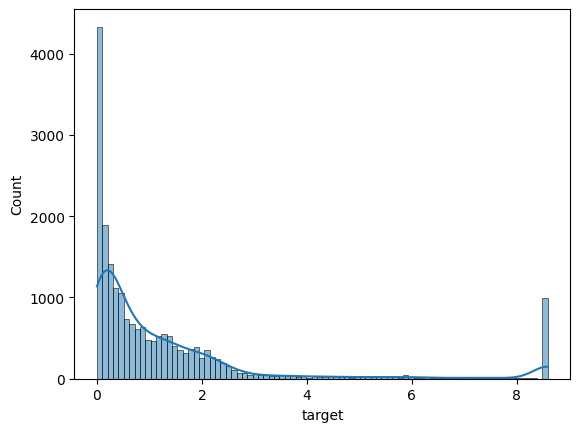

In [33]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
#hist_plot = squared_errors.histplot('hist')

# Importando as bibliotecas necessárias 
import seaborn as sns

# Plot do histograma
sns.histplot(data = squared_errors, kde = True)
plt.show

### Para Regressão Linear Simples usaremos como variável explanatória a variável RM que representa o número médio de quartos nas casas.

In [34]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variavel, vies = 0):
    observacoes = float(len(variavel))
    return np.sqrt(np.sum((variavel - np.mean(variavel))**2) / (observacoes - min(vies, 1)))

In [35]:
# Imprimindo o desvio padrão via fórmula e via NumPy da variável RM
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['AveRooms']), np.std(dataset['AveRooms'])))

Resultado da Função: 2.47411 Resultado do Numpy: 2.47411


In [36]:
# Funções para calcular a variância da variável AveRooms e a correlação com a variável target
def covariance(variavel_1, variavel_2, vies = 0):
    observacoes = float(len(variavel_1))
    return np.sum((variavel_1 - np.mean(variavel_1)) * (variavel_2 - np.mean(variavel_2))) / (observacoes - min(vies,1))

def standardize(variavel):
    return (variavel - np.mean(variavel)) / np.std(variavel)

def correlation(var1, var2, vies = 0):
    return covariance(standardize(var1), standardize(var2), vies)

In [37]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['AveRooms'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['AveRooms'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.15195
Correlação a partir da função pearsonr do SciPy: 0.15195


In [38]:
# Definindo o range dos valores de x e y
x_range = [dataset['AveRooms'].min(),dataset['AveRooms'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

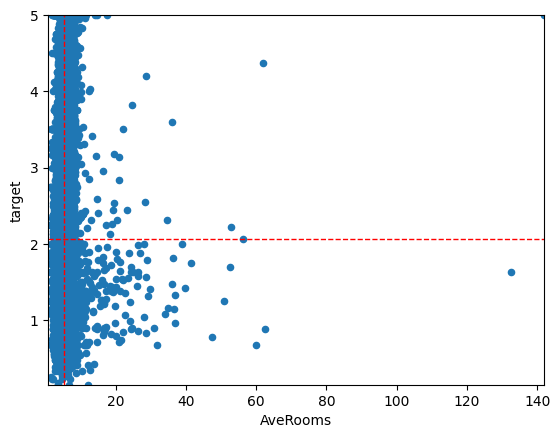

In [39]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'AveRooms', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['AveRooms'].mean(), dataset['AveRooms'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com o StatsModels

https://www.statsmodels.org/stable/index.html

In [40]:
# Importando as funções
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix.
y = dataset['target']
X = dataset['RM']

In [ ]:
# Esse comando adiciona os valores dos coefientes à variável X (o viés será calculado internamente pela função)
X = sm.add_constant(X)

In [ ]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [ ]:
# Criando o modelo de regressão
modelo = sm.OLS(y, X)

# Treinando o modelo
modelo_v1 = modelo.fit()

In [ ]:
print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           2.49e-74
Time:                        18:56:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [ ]:
print(modelo_v1.params)

const   -34.670621
RM        9.102109
dtype: float64


In [ ]:
# Gerando os valores previstos
valores_previstos = modelo_v1.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [ ]:
# Fazendo previsões com o modelo treinado
RM = 5
Xp = np.array([1, RM])
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v1.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


### Gerando um ScatterPlot com a Linha de Regressão

In [ ]:
# Range de valores para x e y
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

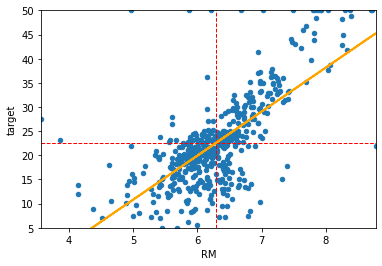

In [ ]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [ ]:
# Gerando os resíduos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

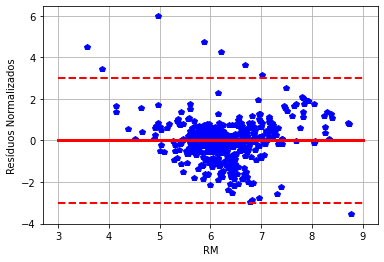

In [ ]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados,'bp')
plt.xlabel('RM') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [41]:
from sklearn import linear_model

In [47]:
# Cria o objeto
modelo_v2 = linear_model.LinearRegression(fit_intercept=True)

In [48]:
# Cria o objeto
modelo_v2 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [49]:
# Define os valores de x e y
num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dataset['target'].values # y pode ser um vetor

KeyError: 'RM'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Número de dimensões de X (matriz)
np.ndim(X)

2

In [ ]:
print(X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [ ]:
type(y)

numpy.ndarray

In [ ]:
# Número de dimensões de y (vetor)
np.ndim(y)

1

In [ ]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
# Treinamento do modelo - fit()
modelo_v2.fit(X,y)

LinearRegression(normalize=False)

In [ ]:
# Imprime os coeficientes
print (modelo_v2.coef_)
print (modelo_v2.intercept_)

[9.10210898]
-34.67062077643857


In [ ]:
# Imprime as previsões
print (modelo_v2.predict(X))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [ ]:
# Fazendo previsões com o modelo treinado
RM = 5
# Xp = np.array(RM)
Xp = np.array(RM).reshape(-1, 1)
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


### Bonus - Comparando tempos de execução dos modelos.
### Comparação StatsModels x ScikitLearn

In [ ]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 100000000, n_features = 1, n_targets = 1, random_state = 101)

In [ ]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

CPU times: total: 6.5 s
Wall time: 5.85 s


LinearRegression(normalize=False)

In [ ]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: total: 18.7 s
Wall time: 11.2 s
